In [1]:
import os
import sys
import shutil
import dotenv
from   dotenv import find_dotenv, load_dotenv
import matplotlib
load_dotenv(find_dotenv())
PATH_P     = os.environ['PATH_P']
os.chdir(PATH_P)
sys.path.insert(0, PATH_P)
import pandas as pd
from src.dst.outputhandler.pickle import tic,toc,pickle_save_,pickle_load
from src.dst.plots.plots import plotting_tool,retrieve_data,SeabornFig2Grid
from src.visualization.vis_LSTM_p.main import main_visualize
import  numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from src.visualization.vis_LSTM_p.main import main_visualize
from src.models.CMA_ES.CMA_ES import CMA_ES

## experiments

In [2]:
path                                  =  './models/segmentated_shuffle/bayes_opt/DEEP2/'
RD                                    = retrieve_data()
data,dict_,path_best,hist             = RD.get_best_D1(path)
data['df_t_val_train']                = pd.concat([data['df_t_train'],data['df_t_val']])
AUC_v_a                               = RD.get_all(path,'AUC_v')

val_loss_a                            = RD.get_all(path,'val_f')
dict_['AUC_v']                        = data['AUC_v']

RD.print_dict(dict_)

str_list                              = data['path_o'].split('/')
data['path_o']                        = path_best
BO_vis                                = plotting_tool(dict_)

lr           : 0.001267345303142497
time_dim     : 20
encoder      : [240, 443]
decoder      : [470]
vector       : 240
AUC_v        : 0.7134902394733854


In [3]:
def return_dict():
    dict_c = {
        'path_i'   : './models/bayes_opt/DEEP2/',
        'path_save': './models/CMA_ES/DEEP2/',

        'resolution_AUC': 1000,

        ###### CMA_ES    ######
        'CMA_ES': True,
        'verbose_CMA': 1,
        'verbose_CMA_log': 0,
        'evals': 21*150,
        'bounds': [-100., 100.],
        'sigma': 0.4222222222222225,
        'progress_ST': 0.3,
        'popsize'    : 21,
        
        'mode'       : 'linear',

        'epoch': 0

    }

    return dict_c

## Min plus linear

In [13]:
dict_c = return_dict()
dict_c['mode']   = 'linear'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/min_pos_linear')
# CMA_ES(dict_c).main(data,path,dict_)

In [14]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

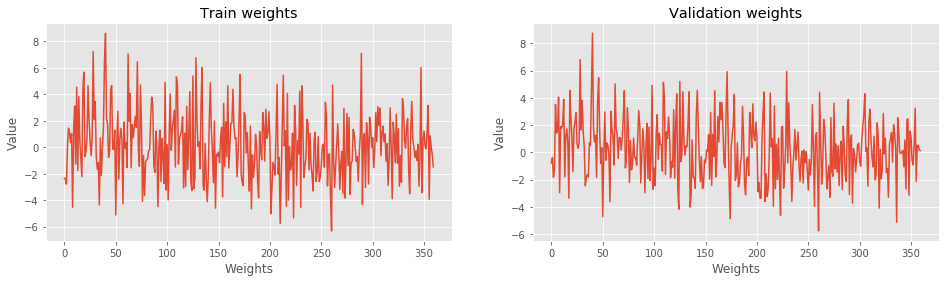

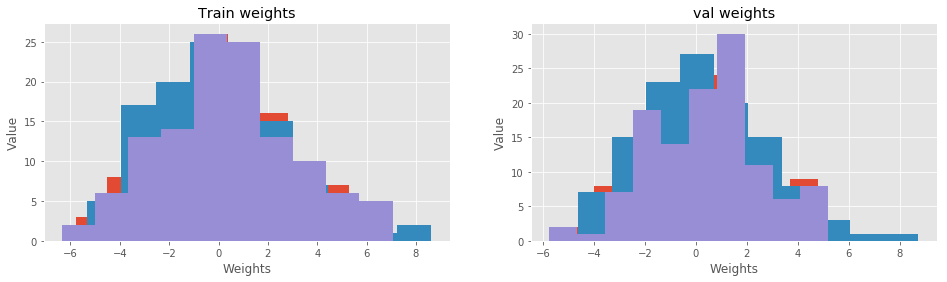

In [15]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

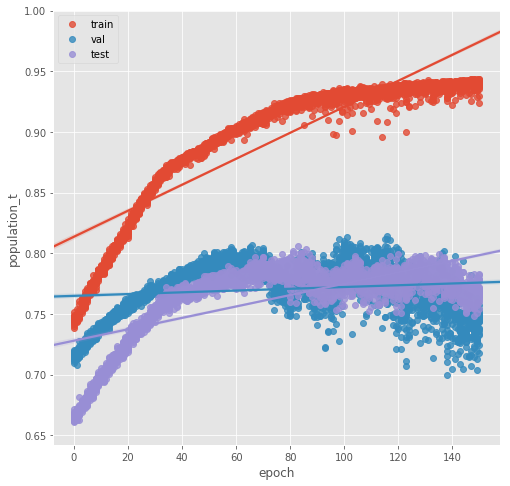

In [16]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

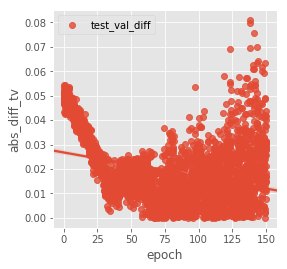

In [17]:
f, ax = plt.subplots(figsize=(4, 4))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()


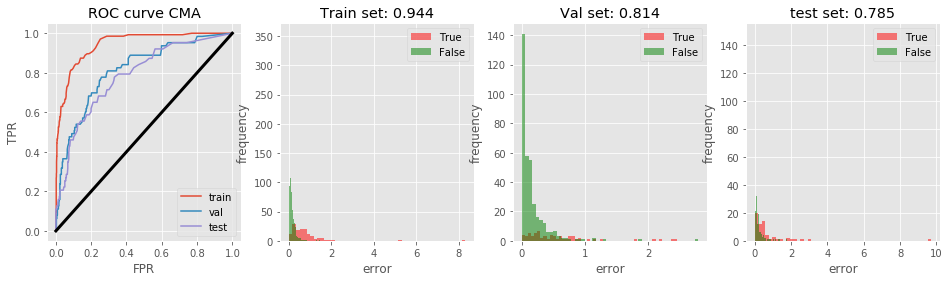

In [18]:
BO_vis.plot_cma(data)

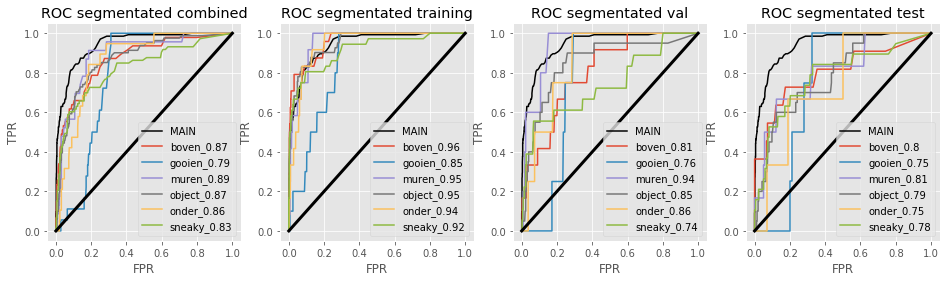

In [19]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

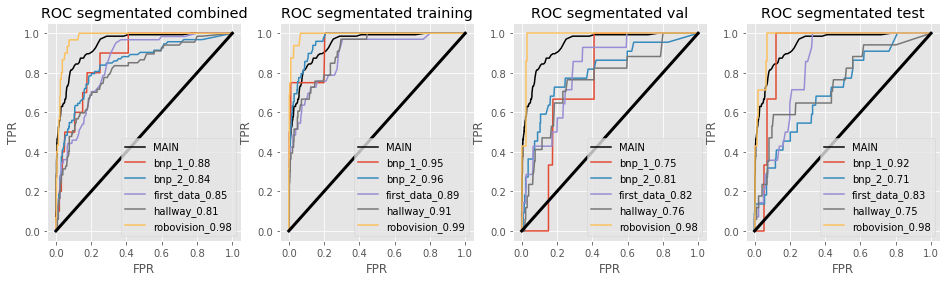

In [20]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus linear

In [21]:
dict_c = return_dict()
dict_c['mode']   = 'linear'
dict_c['bounds'] = [0,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_linear')
# CMA_ES(dict_c).main(data,path,dict_)

In [22]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

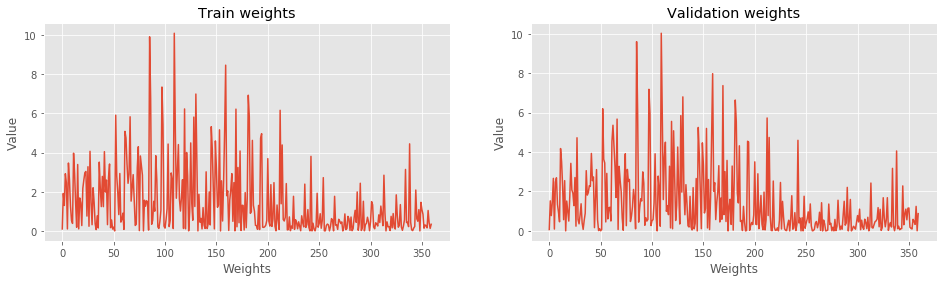

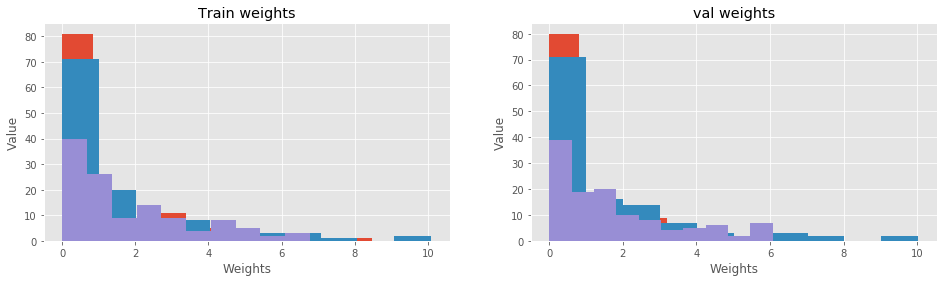

In [23]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

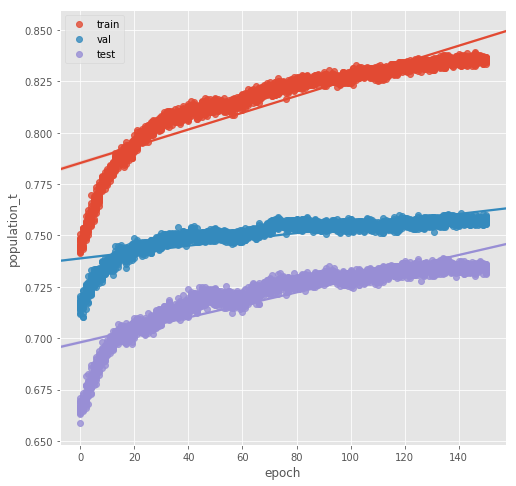

In [24]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

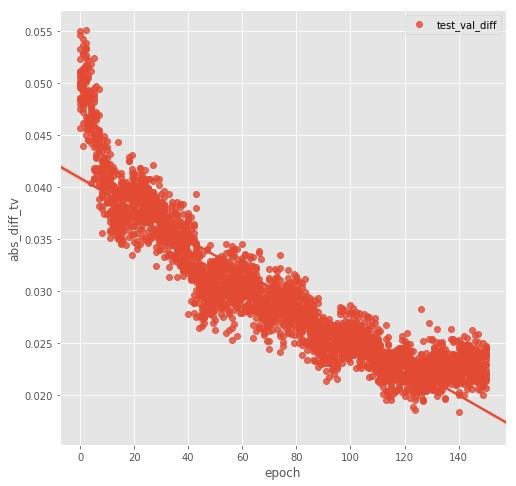

In [25]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

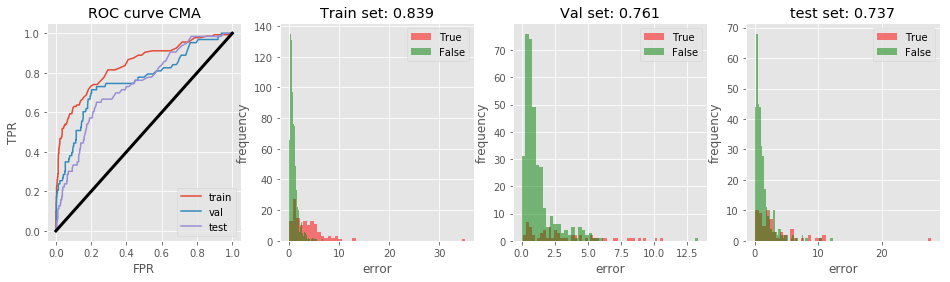

In [26]:
BO_vis.plot_cma(data)

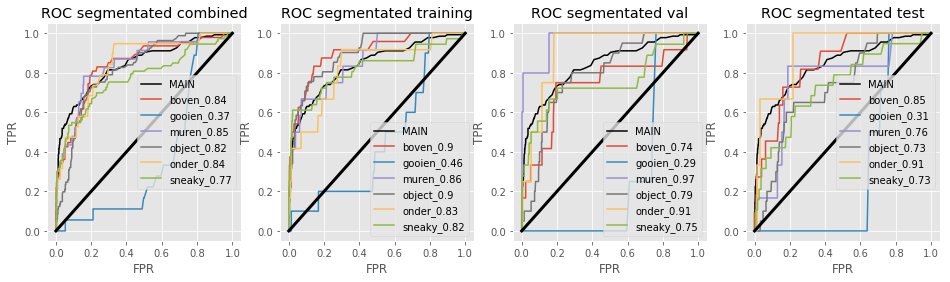

In [27]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

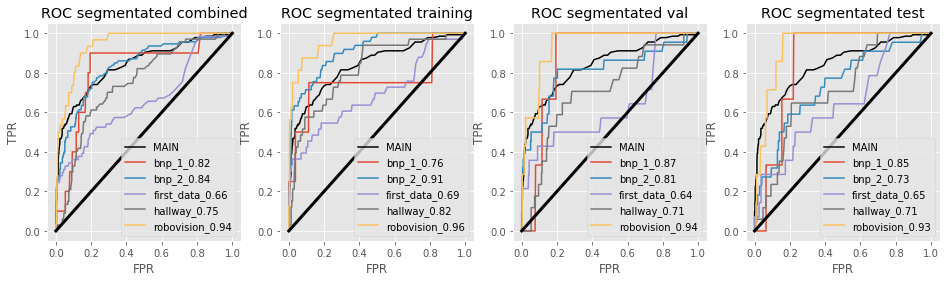

In [28]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus min sigmoid

In [29]:
dict_c = return_dict()
dict_c['mode']   = 'sigmoid'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_min_sigmoid')
# CMA_ES(dict_c).main(data,path,dict_)

In [30]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

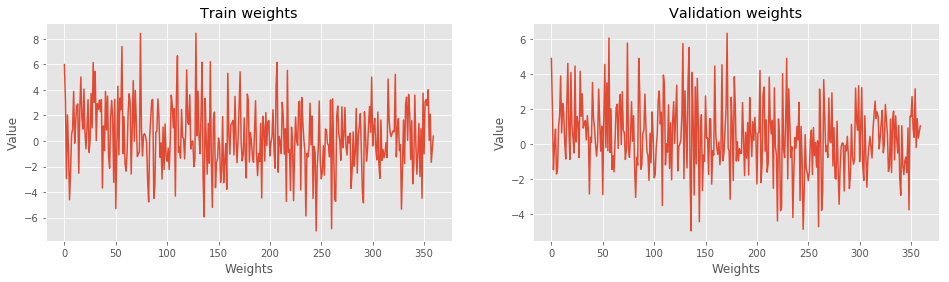

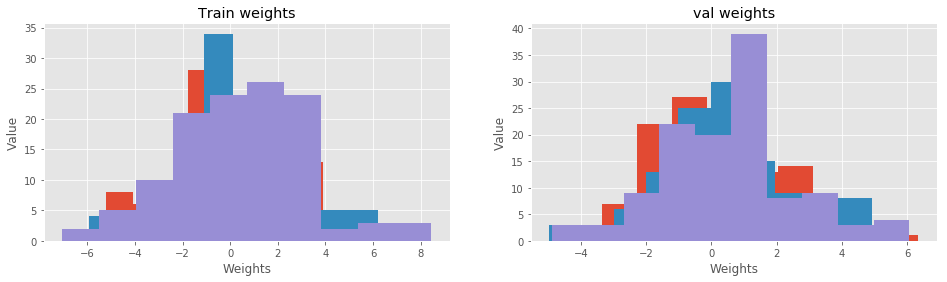

In [31]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

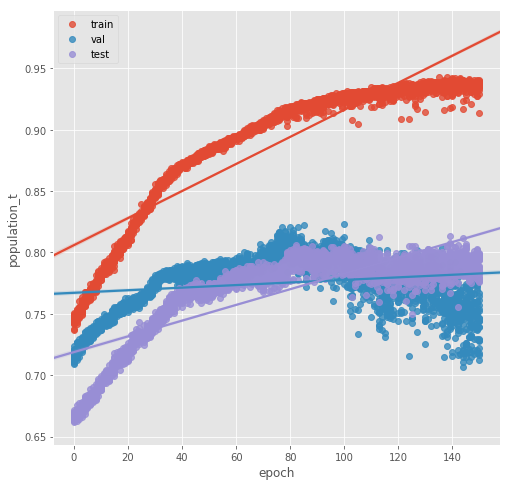

In [32]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

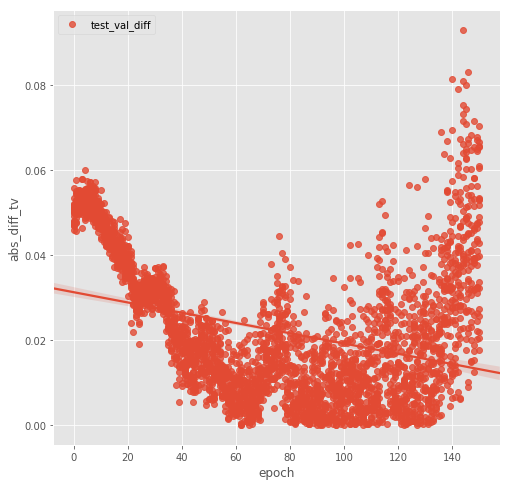

In [33]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

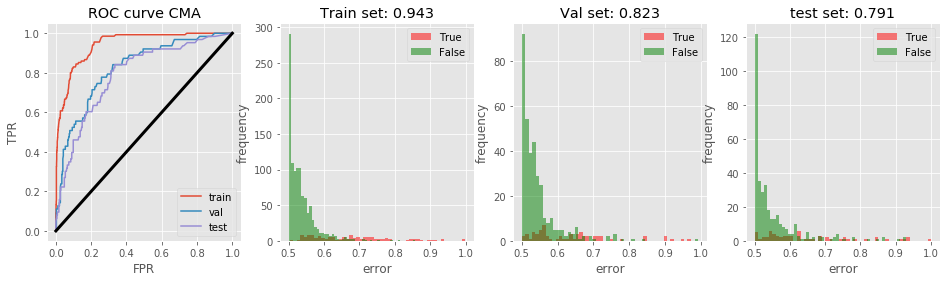

In [34]:
BO_vis.plot_cma(data)

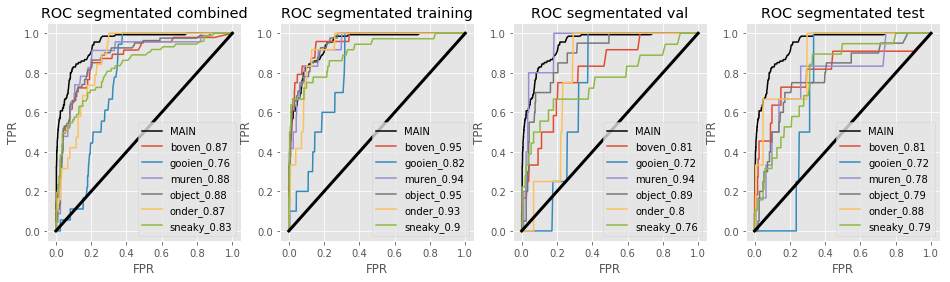

In [35]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

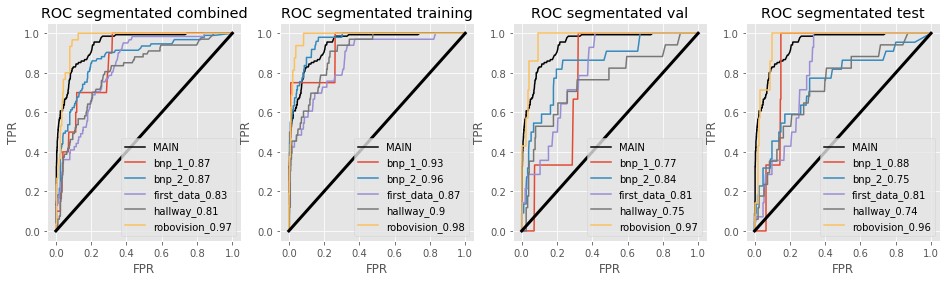

In [36]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus sigmoid

In [37]:
dict_c = return_dict()
dict_c['mode']   = 'sigmoid'
dict_c['bounds'] = [0,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_sigmoid')
# CMA_ES(dict_c).main(data,path,dict_)

In [38]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

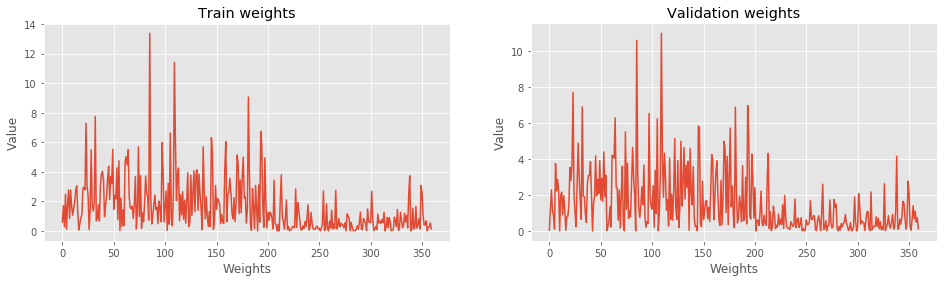

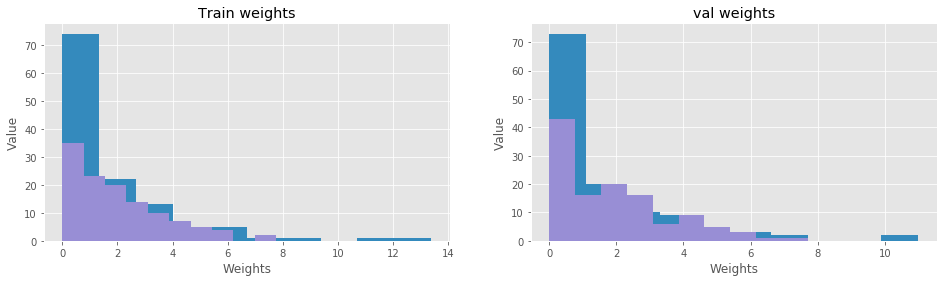

In [39]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

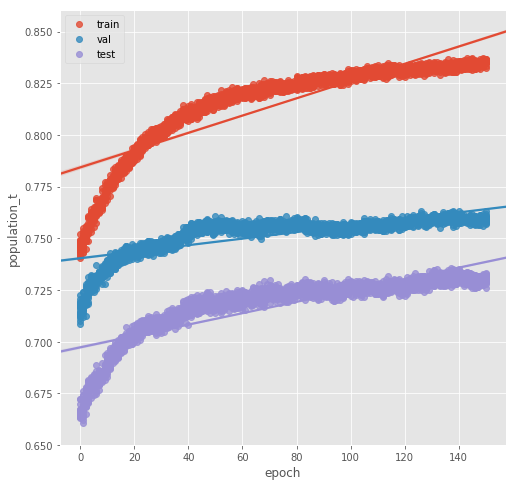

In [40]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

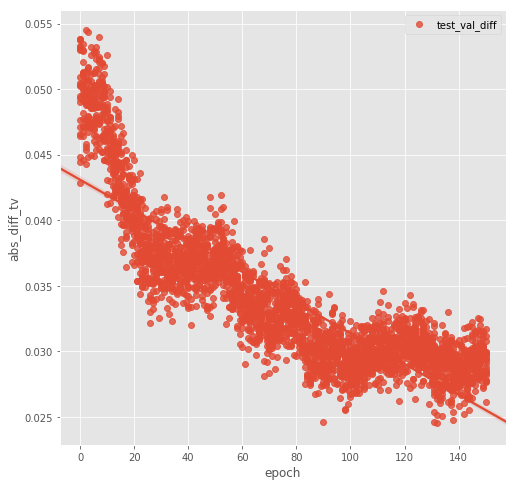

In [41]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

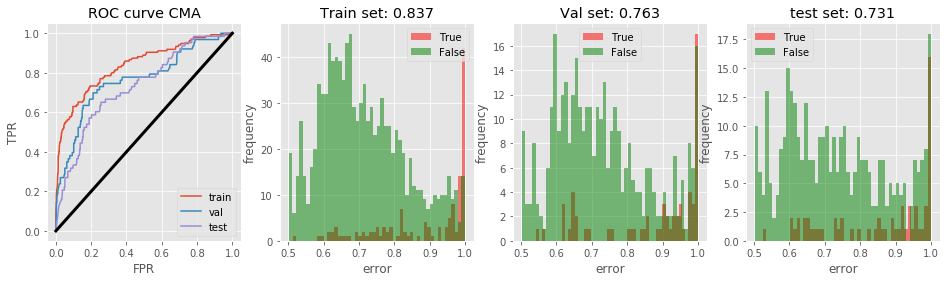

In [42]:
BO_vis.plot_cma(data)

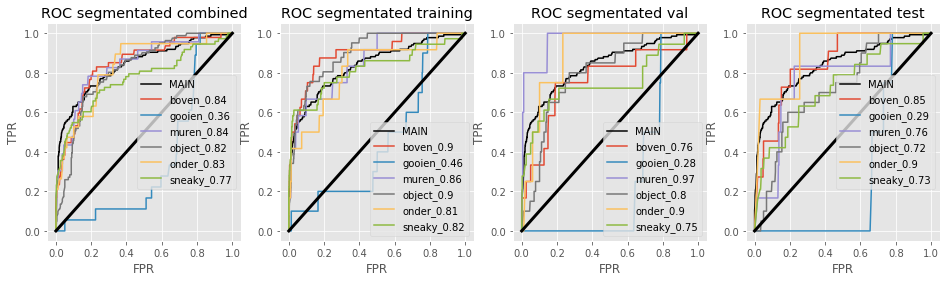

In [43]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

In [ ]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus leaky relu

In [4]:
dict_c = return_dict()
dict_c['mode']   = 'leaky_relu'
dict_c['bounds'] = [0,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_leaky_relu')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 360 (seed=1091899, Thu May 10 16:38:22 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -7.544919100578595e-01 1.0e+00 4.15e-01  4e-01  4e-01 0:50.8
    2     42 -7.588365727748327e-01 1.0e+00 4.09e-01  4e-01  4e-01 1:04.4
    3     63 -7.590271281571562e-01 1.0e+00 4.03e-01  4e-01  4e-01 1:16.9
    4     84 -7.611128434327686e-01 1.0e+00 3.98e-01  4e-01  4e-01 1:24.5
    5    105 -7.631431244153416e-01 1.0e+00 3.94e-01  4e-01  4e-01 1:34.6
    6    126 -7.659979905068772e-01 1.0e+00 3.89e-01  4e-01  4e-01 1:44.5
    7    147 -7.672903024633615e-01 1.0e+00 3.86e-01  4e-01  4e-01 1:53.3
    8    168 -7.709940061670650e-01 1.0e+00 3.82e-01  4e-01  4e-01 2:01.7
    9    189 -7.729931053598031e-01 1.0e+00 3.79e-01  4e-01  4e-01 2:10.0
   10    210 -7.741641548002632e-01 1.0e+00 3.76e-01  4e-01  4e-01 2:21.3
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -7.78006

  100   2100 -8.333090808301284e-01 1.1e+00 3.61e-01  4e-01  4e-01 21:25.9
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -8.318470013512108e-01 1.1e+00 3.61e-01  4e-01  4e-01 22:13.5
  102   2142 -8.323008696254721e-01 1.1e+00 3.61e-01  4e-01  4e-01 22:21.3
  103   2163 -8.318400720645809e-01 1.1e+00 3.61e-01  4e-01  4e-01 22:30.4
  104   2184 -8.317499913383918e-01 1.1e+00 3.62e-01  4e-01  4e-01 22:38.8
  105   2205 -8.331739597408446e-01 1.2e+00 3.62e-01  4e-01  4e-01 22:48.0
  106   2226 -8.327651318296780e-01 1.2e+00 3.61e-01  4e-01  4e-01 22:57.0
  107   2247 -8.336174340851610e-01 1.2e+00 3.61e-01  4e-01  4e-01 23:04.4
  108   2268 -8.345355645636282e-01 1.2e+00 3.61e-01  4e-01  4e-01 23:12.2
  109   2289 -8.339119287669333e-01 1.2e+00 3.61e-01  4e-01  4e-01 23:19.9
  110   2310 -8.354814121886152e-01 1.2e+00 3.61e-01  4e-01  4e-01 23:29.0
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -8.354363718255207

In [5]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

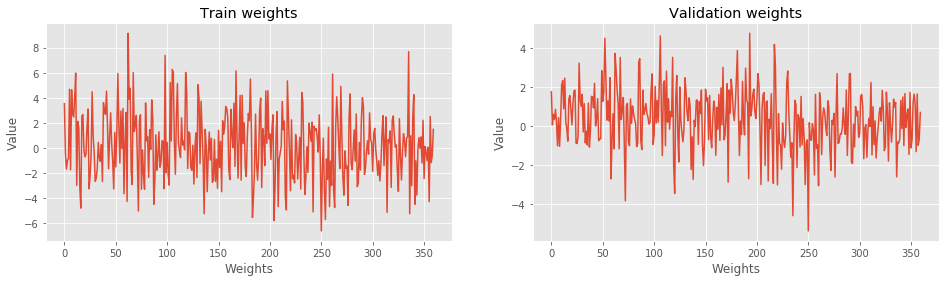

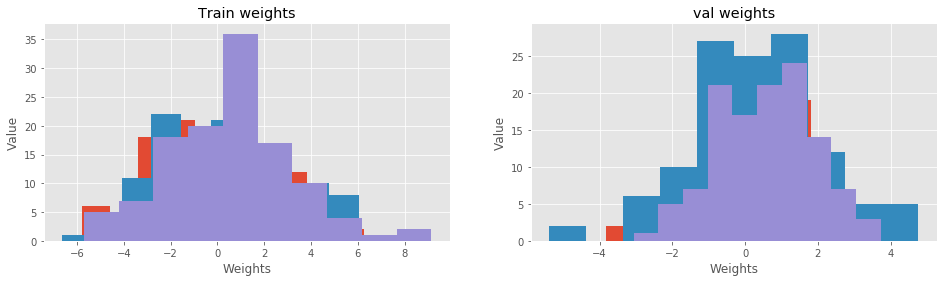

In [20]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])


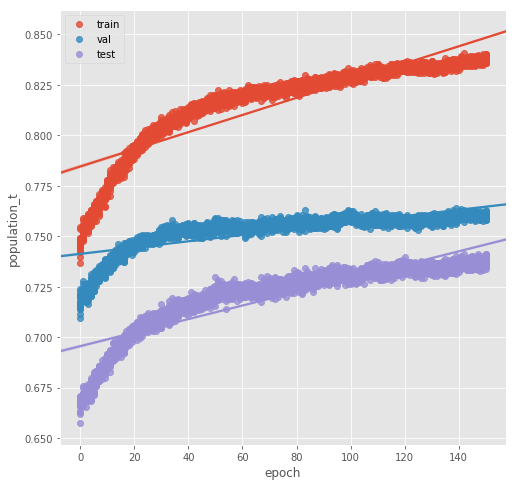

In [7]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

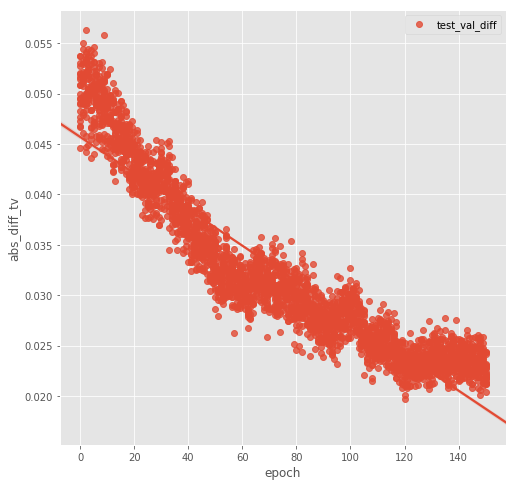

In [8]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

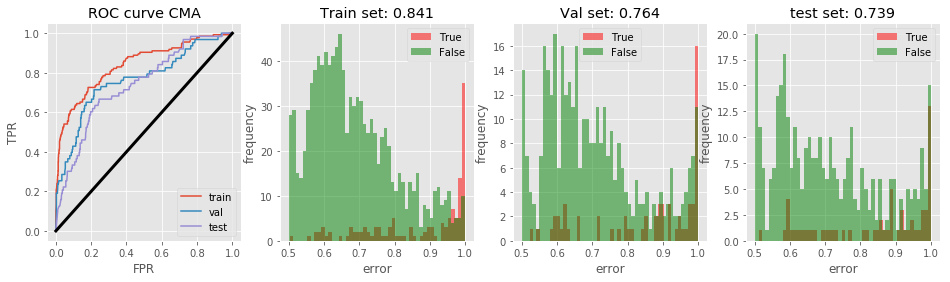

In [9]:
BO_vis.plot_cma(data)

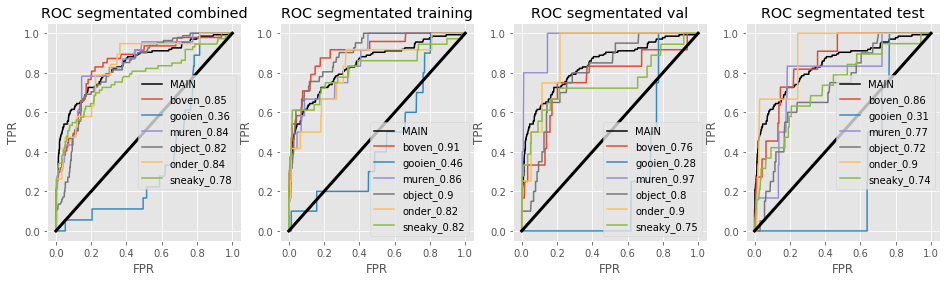

In [10]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

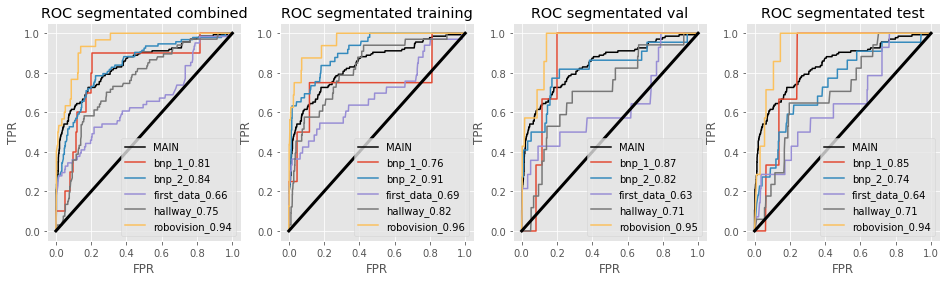

In [11]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus min leaky relu

In [12]:
dict_c = return_dict()
dict_c['mode']   = 'leaky_relu'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_min_leaky_relu')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 360 (seed=1099280, Thu May 10 17:11:42 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -7.514568825139453e-01 1.0e+00 4.15e-01  4e-01  4e-01 0:48.9
    2     42 -7.581956137615632e-01 1.0e+00 4.09e-01  4e-01  4e-01 0:56.7
    3     63 -7.585905830994698e-01 1.0e+00 4.03e-01  4e-01  4e-01 1:04.6
    4     84 -7.643800020787860e-01 1.0e+00 3.98e-01  4e-01  4e-01 1:12.5
    5    105 -7.714062987215465e-01 1.0e+00 3.94e-01  4e-01  4e-01 1:21.0
    6    126 -7.720645809513912e-01 1.0e+00 3.90e-01  4e-01  4e-01 1:29.5
    7    147 -7.744794373419256e-01 1.0e+00 3.86e-01  4e-01  4e-01 1:37.8
    8    168 -7.784603125108271e-01 1.0e+00 3.83e-01  4e-01  4e-01 1:46.1
    9    189 -7.807435124553928e-01 1.0e+00 3.80e-01  4e-01  4e-01 1:54.2
   10    210 -7.842254789869383e-01 1.0e+00 3.77e-01  4e-01  4e-01 2:01.9
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -7.90787

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -9.324810310778505e-01 1.2e+00 4.84e-01  5e-01  5e-01 21:03.3
  102   2142 -9.340678377161074e-01 1.2e+00 4.85e-01  5e-01  5e-01 21:11.8
  103   2163 -9.350829782073936e-01 1.2e+00 4.87e-01  5e-01  5e-01 21:19.6
  104   2184 -9.349339985448497e-01 1.2e+00 4.88e-01  5e-01  5e-01 21:28.6
  105   2205 -9.360634722655303e-01 1.2e+00 4.90e-01  5e-01  5e-01 21:36.2
  106   2226 -9.361881994248691e-01 1.2e+00 4.92e-01  5e-01  5e-01 21:43.9
  107   2247 -9.366524616290752e-01 1.2e+00 4.93e-01  5e-01  5e-01 21:51.7
  108   2268 -9.360981186986799e-01 1.2e+00 4.94e-01  5e-01  5e-01 21:59.9
  109   2289 -9.355229879083948e-01 1.2e+00 4.96e-01  5e-01  5e-01 22:08.6
  110   2310 -9.363337144440980e-01 1.2e+00 4.98e-01  5e-01  5e-01 22:16.5
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -9.359733915393412e-01 1.2e+00 4.99e-01  5e-01  5e-01 23:00.9
  112   2352 -9.358105533035375

In [13]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

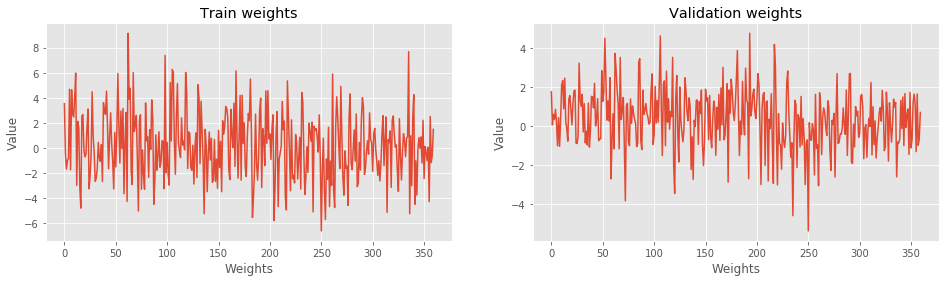

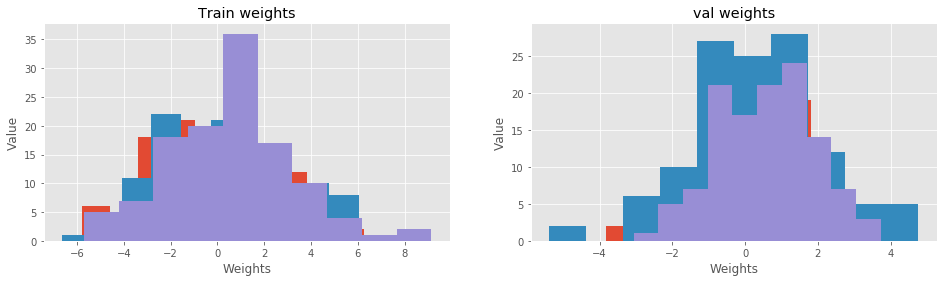

In [21]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

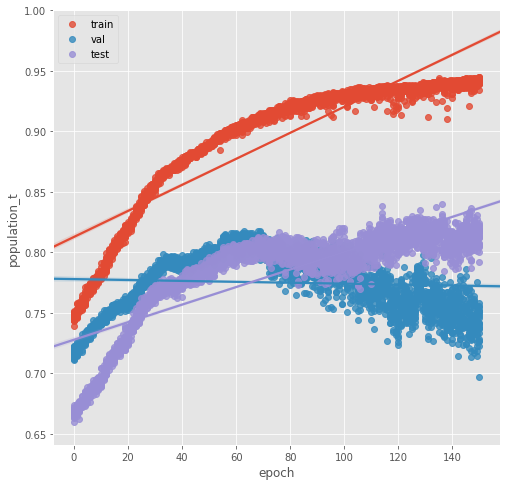

In [15]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

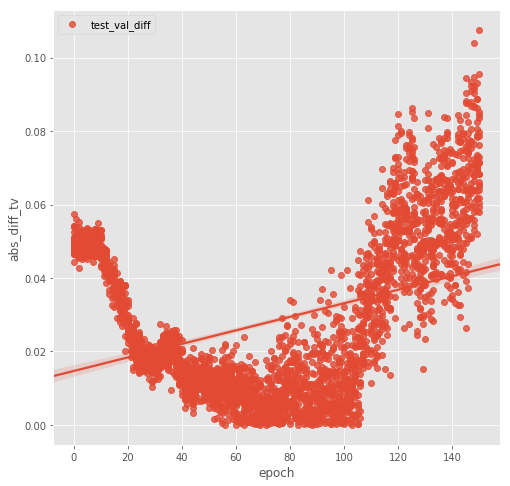

In [16]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

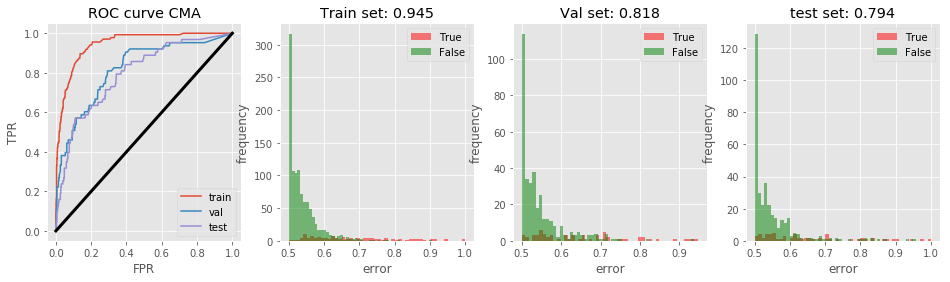

In [17]:
BO_vis.plot_cma(data)

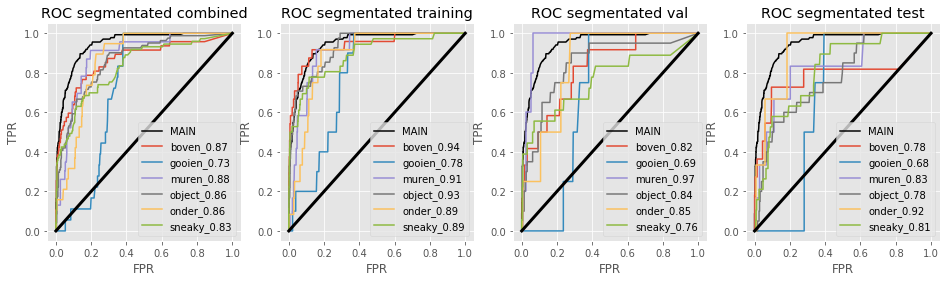

In [18]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

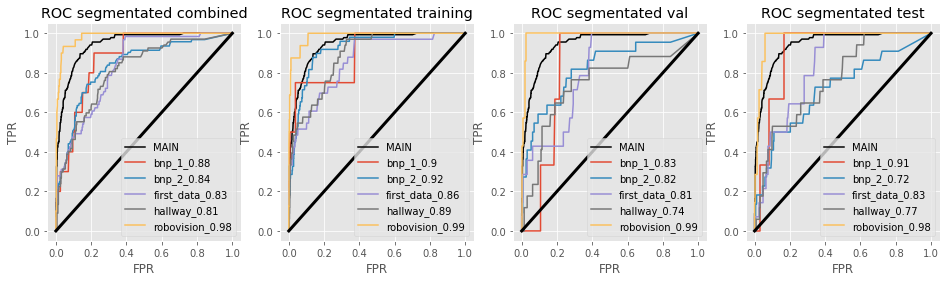

In [19]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

# DEEP2

In [ ]:
# path                                  =  './models/CMA_ES/DEEP2/'
# path_a                                = [path]
# RD                                    = retrieve_data()
# df,dict_,path_best                    = RD.get_max_CMA(path)


# BO_vis                                = plotting_tool(dict_['dict_config'])

# df                                     = df[df['epoch'] < 150]
# array_AUC_tr_a                         = RD.get_all_cma(path_a,'AUC_tr')
# array_AUC_v_a                          = RD.get_all_cma(path_a,'AUC_v')
# array_AUC_t_a                          = RD.get_all_cma(path_a,'AUC_t')

In [ ]:
fig = plt.figure(figsize=(16,4))

ax1 = plt.subplot(141)
ax1 = plt.hist(array_AUC_tr_a)

ax2 = plt.subplot(142)
ax2 = plt.hist(array_AUC_v_a)

ax3 = plt.subplot(143)
ax3 = plt.hist(array_AUC_t_a)


ax4 = plt.subplot(144)
ax4 = plt.plot(array_AUC_tr_a,label = 'train')
ax4 = plt.plot(array_AUC_v_a,label = 'val')
ax4 = plt.plot(array_AUC_t_a,label = 'test')
plt.legend()
plt.show()


In [ ]:
BO_vis.plot_weigths(dict_['x_tr'],dict_['x_v'])

In [ ]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))



ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()
plt.savefig('./plots/pic/CMA_training')

In [ ]:
BO_vis.plot_cma(dict_)

In [ ]:
dict_['path_o'] = dict_['dict_config']['path_save']
BO_vis.save_ROC_segment(dict_,'segmentation',cma = True)

In [ ]:
dict_['path_o'] = dict_['dict_config']['path_save']
BO_vis.save_ROC_segment(dict_,'location',cma = True)

In [ ]:
dict_c = {
        'path'       :  path_best+'/',
        'mode'       : 'df_t_train',

        'path_dict'  : path_best+'/dict.p',

        'plot_mode'  : 'error'


}
vis = main_visualize(dict_c)
vis.play_videos()


In [ ]:
path_best+'/dict.p'